In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Goal: Predicting Whether the employee is leaving the firm , based on consecutive absences

In [3]:
np.set_printoptions(suppress=True,linewidth=150)

#### Loading the data

In [4]:
abs_data=np.genfromtxt('Absenteeism-data.csv',delimiter=',',skip_header=True)

In [5]:
abs_headers=np.genfromtxt('Absenteeism-data.csv',delimiter=',',skip_footer=abs_data.shape[0],dtype=str)

In [6]:
abs_headers

array(['ID', 'Reason for Absence', 'Date', 'Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'], dtype='<U25')

#### Data backup

In [7]:
abs_backup=abs_data

#### Examining the data

In [8]:
abs_data[:]

array([[11., 26., nan, ...,  2.,  1.,  4.],
       [36.,  0., nan, ...,  1.,  0.,  0.],
       [ 3., 23., nan, ...,  0.,  0.,  2.],
       ...,
       [18., 10., nan, ...,  0.,  0.,  8.],
       [25., 23., nan, ...,  0.,  0.,  2.],
       [15., 28., nan, ...,  1.,  1.,  2.]])

In [9]:
abs_mean=np.nanmean(abs_data,axis=0)
abs_mean

C:\Users\mmopa\AppData\Local\Temp\ipykernel_8644\1058588308.py:1: RuntimeWarning: Mean of empty slice
  abs_mean=np.nanmean(abs_data,axis=0)


array([ 17.95142857,  19.41142857,          nan, 222.34714286,  29.89285714,  36.41714286, 271.80177429,  26.73714286,   1.28285714,   1.02142857,
         0.68714286,   6.76142857])

## Spliting data :

In [10]:
numb_indices=np.where(~np.isnan(abs_mean))
str_indices=np.where(np.isnan(abs_mean))
str_indices[0]

array([2], dtype=int64)

In [11]:
abs_date=np.genfromtxt('Absenteeism-data.csv',delimiter=',',skip_header=True,usecols=str_indices[0],dtype=str)

In [12]:
abs_numeric=np.genfromtxt('Absenteeism-data.csv',delimiter=',',skip_header=True,usecols=numb_indices[0])

#### ID column

In [13]:
#Checking unique ids , so We can create new data with unique ids ,
# With new column indicating number of absense ,
# And another column indicating days-gap between absences ,
# That way we don't lose any data
np.unique(abs_numeric[:,0],return_index=True)

(array([ 1.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
        30., 31., 32., 33., 34., 36.]),
 array([  9,  31,   2,  43,  18,   3, 276, 255,   6,   0, 564,  58,   8,  47, 647,  83,  20,  37,   7, 261,  65, 200,  15, 508, 256,  40,  52,  51,
         27, 144, 234,  19,  41,   1], dtype=int64))

In [14]:
unique_id_indices=np.unique(abs_numeric[:,0],return_index=True)[1]

In [15]:
# Thats our new numeric data-set
new_abs_numeric=abs_numeric[unique_id_indices]
new_abs_numeric

array([[  1.   ,  22.   , 235.   ,  11.   ,  37.   , 239.554,  29.   ,   3.   ,   1.   ,   1.   ,   8.   ],
       [  2.   ,  18.   , 235.   ,  29.   ,  48.   , 205.917,  33.   ,   1.   ,   1.   ,   5.   ,   8.   ],
       [  3.   ,  23.   , 179.   ,  51.   ,  38.   , 239.554,  31.   ,   1.   ,   0.   ,   0.   ,   2.   ],
       [  5.   ,  19.   , 235.   ,  20.   ,  43.   , 241.476,  38.   ,   1.   ,   1.   ,   0.   ,   8.   ],
       [  6.   ,  11.   , 189.   ,  29.   ,  33.   , 239.554,  25.   ,   1.   ,   2.   ,   2.   ,   8.   ],
       [  7.   ,   7.   , 279.   ,   5.   ,  39.   , 239.554,  24.   ,   1.   ,   2.   ,   0.   ,   4.   ],
       [  8.   ,   0.   , 231.   ,  35.   ,  39.   , 294.217,  35.   ,   1.   ,   2.   ,   2.   ,   0.   ],
       [  9.   ,  18.   , 228.   ,  14.   ,  58.   , 265.615,  22.   ,   1.   ,   2.   ,   1.   ,   8.   ],
       [ 10.   ,  22.   , 361.   ,  52.   ,  28.   , 239.554,  27.   ,   1.   ,   1.   ,   4.   ,   8.   ],
       [ 11.   ,  26.   , 28

In [16]:
count_absence_col=np.unique(abs_data[:,0],return_counts=True)[1]
count_absence_col=np.reshape(count_absence_col,(count_absence_col.shape[0],1))
count_absence_col

array([[ 22],
       [  5],
       [113],
       [ 18],
       [  7],
       [  6],
       [  1],
       [  6],
       [ 22],
       [ 39],
       [  3],
       [ 14],
       [ 27],
       [ 36],
       [  1],
       [ 19],
       [ 16],
       [  3],
       [ 42],
       [  2],
       [ 41],
       [  7],
       [ 30],
       [ 10],
       [  5],
       [  7],
       [ 74],
       [  5],
       [  7],
       [  3],
       [  5],
       [ 24],
       [ 48],
       [ 32]], dtype=int64)

In [17]:
new_abs_numeric=np.append(new_abs_numeric,count_absence_col,axis=1)

In [18]:
unique=np.unique(abs_numeric[:,0],return_counts=True)
unique[1]

array([ 22,   5, 113,  18,   7,   6,   1,   6,  22,  39,   3,  14,  27,  36,   1,  19,  16,   3,  42,   2,  41,   7,  30,  10,   5,   7,  74,   5,
         7,   3,   5,  24,  48,  32], dtype=int64)

In [19]:
#new_abs_numeric=np.column_stack([new_abs_numeric,count_absence_col])

In [20]:
alfa=[v for v in abs_numeric[:5,1]]
alfa

[26.0, 0.0, 23.0, 7.0, 23.0]

In [21]:
#List_a will contain avg of [reasonsOfAbsence,DailyWorkLoad,AbsenceTimeInHrs]
dict_reasons={}
dict_avgwork={}
dict_abstime={}

In [22]:
for i,j in enumerate(abs_numeric[:,0]):
    if int(j) in dict_reasons:
        dict_reasons[int(j)]+=abs_numeric[i,1]
        dict_avgwork[int(j)]+=abs_numeric[i,5]
        dict_abstime[int(j)]+=abs_numeric[i,10]
    else:
        dict_reasons[int(j)]=abs_numeric[i,1]
        dict_avgwork[int(j)]=abs_numeric[i,5]
        dict_abstime[int(j)]=abs_numeric[i,10]

In [23]:
for i,j in enumerate(unique[0]):
    dict_reasons[int(j)]/=unique[1][i]
    dict_avgwork[int(j)]/=unique[1][i]
    dict_abstime[int(j)]/=unique[1][i]

In [24]:
int(dict_reasons[1])

18

In [25]:
list_reasons=list(dict_reasons.values())
list_avgwork=list(dict_avgwork.values())
list_abstime=list(dict_abstime.values())

In [26]:
for i,j in enumerate(new_abs_numeric[:,0]):
    new_abs_numeric[i,1]=int(dict_reasons[int(j)])
    new_abs_numeric[i,5]=int(dict_avgwork[int(j)])
    new_abs_numeric[i,10]=int(dict_abstime[int(j)])

In [27]:
new_abs_numeric[:,11]

array([ 22.,   5., 113.,  18.,   7.,   6.,   1.,   6.,  22.,  39.,   3.,  14.,  27.,  36.,   1.,  19.,  16.,   3.,  42.,   2.,  41.,   7.,  30.,
        10.,   5.,   7.,  74.,   5.,   7.,   3.,   5.,  24.,  48.,  32.])

## Visuals

C:\Users\mmopa\AppData\Local\Temp\ipykernel_8644\3972494450.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


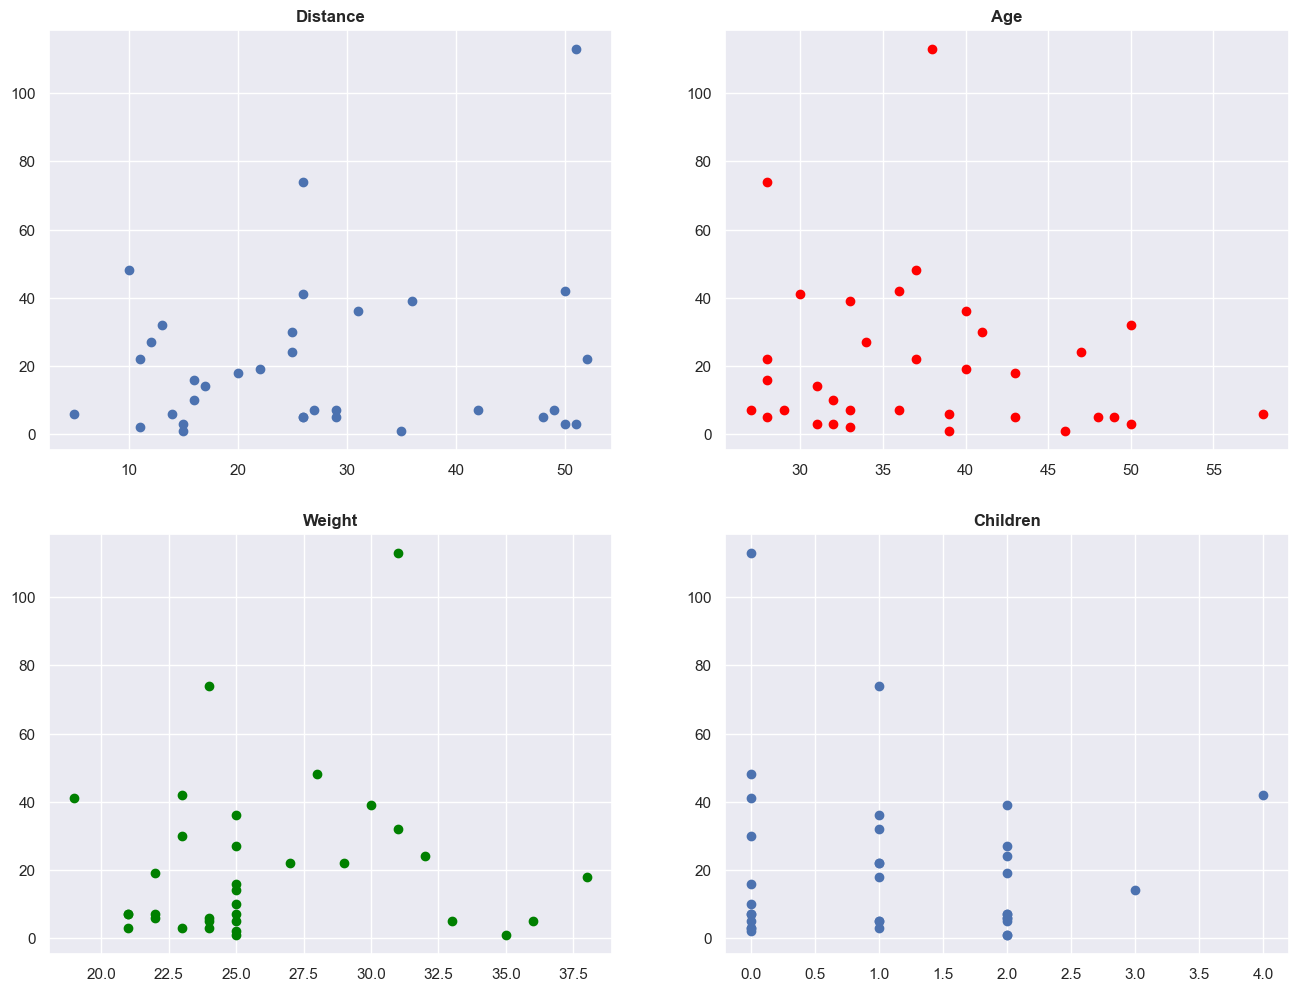

In [29]:
#Plotting Age to absenteeism in hrs
fig,axis=plt.subplots(2,2,figsize=(16,12))
axis[0,0].scatter(new_abs_numeric[:,3],new_abs_numeric[:,11])
axis[0,0].set_title('Distance',weight='bold')
axis[0,1].scatter(new_abs_numeric[:,4],new_abs_numeric[:,11],color='red')
axis[0,1].set_title('Age',weight='bold')
axis[1,0].scatter(new_abs_numeric[:,6],new_abs_numeric[:,11],color='green')
axis[1,0].set_title('Weight',weight='bold')
axis[1,1].scatter(new_abs_numeric[:,8],new_abs_numeric[:,11])
axis[1,1].set_title('Children',weight='bold')
fig.show()

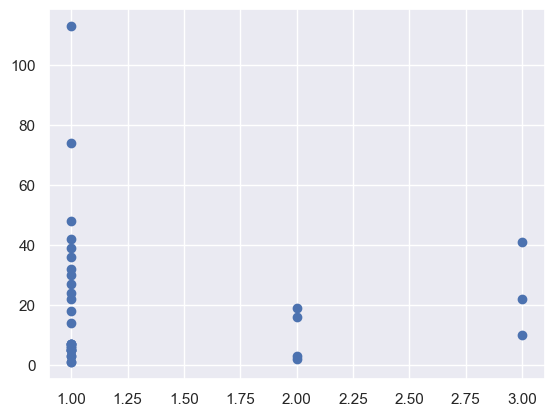

In [30]:
plt.scatter(new_abs_numeric[:,7],new_abs_numeric[:,11])

## Feature engineering

#### BMI

In [31]:
new_abs_numeric[:,6]=np.where(new_abs_numeric[:,6]>25,
                             1,
                             0)

In [32]:
abs_headers[7]='Overweight'
abs_headers

array(['ID', 'Reason for Absence', 'Date', 'Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Overweight', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours'], dtype='<U25')

#### deleting pets

In [33]:
new_abs_numeric=np.delete(new_abs_numeric,9,axis=1)
new_abs_numeric.shape

(34, 11)

In [34]:
new_abs_numeric[:,8]

array([1., 1., 0., 1., 2., 2., 2., 2., 1., 2., 1., 3., 2., 1., 2., 2., 0., 0., 4., 0., 0., 2., 0., 0., 2., 0., 1., 1., 0., 0., 0., 2., 0., 1.])

In [35]:
abs_headers=np.delete(abs_headers,10)
abs_headers

array(['ID', 'Reason for Absence', 'Date', 'Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Overweight', 'Education',
       'Children', 'Absenteeism Time in Hours'], dtype='<U25')

In [36]:
abs_headers=np.append(abs_headers,'Number Of absences')
abs_headers

array(['ID', 'Reason for Absence', 'Date', 'Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Overweight', 'Education',
       'Children', 'Absenteeism Time in Hours', 'Number Of absences'], dtype='<U25')

#### Children

In [37]:
#Setting Children column to dummy, haveChildren = 1 , 0 Not
new_abs_numeric[:,8]=np.where(new_abs_numeric[:,8]>0,
                             1,
                             0)

In [38]:
new_abs_numeric[:,8]

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.])

#### Education

In [39]:
#Setting education column  to dummy |E>1 -----> 1
#                                   | Otherwise 0

In [40]:
np.unique(new_abs_numeric[:,7])

array([1., 2., 3.])

In [41]:
new_abs_numeric[:,7]=np.where(new_abs_numeric[:,7]>1,
                             1,
                             0)

#### Distance

In [42]:
np.unique(new_abs_numeric[:,3],return_counts=True)

(array([ 5., 10., 11., 12., 13., 14., 15., 16., 17., 20., 22., 25., 26., 27., 29., 31., 35., 36., 42., 48., 49., 50., 51., 52.]),
 array([1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1], dtype=int64))

In [43]:
new_abs_numeric[:,3]=np.where(new_abs_numeric[:,3]>20,
                             1,
                             0)

In [92]:
new_abs_numeric[:,5]

array([262., 234., 262., 266., 276., 303., 294., 243., 259., 271., 269., 261., 303., 280., 222., 284., 266., 281., 267., 247., 266., 304., 278.,
       254., 247., 301., 282., 243., 263., 328., 309., 263., 270., 272.])

In [84]:
emp_withchildren_workload=new_abs_numeric[np.where(new_abs_numeric[:,8]==1),5]
emp_withoutchildren_workload=new_abs_numeric[np.where(new_abs_numeric[:,8]==0),5]

In [86]:
emp_withchildren_workload=np.append(emp_withchildren_workload,np.array([[0 for _ in range(12)]]),axis=1)

In [87]:
emp_withoutchildren_workload=np.append(emp_withoutchildren_workload,np.array([[0 for _ in range(22)]]),axis=1)

In [88]:
emp_withchildren_workload.shape

(1, 34)

C:\Users\mmopa\AppData\Local\Temp\ipykernel_8644\2305628602.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend('upperleft',labels=['with children','no children'])
C:\Users\mmopa\AppData\Local\Temp\ipykernel_8644\2305628602.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


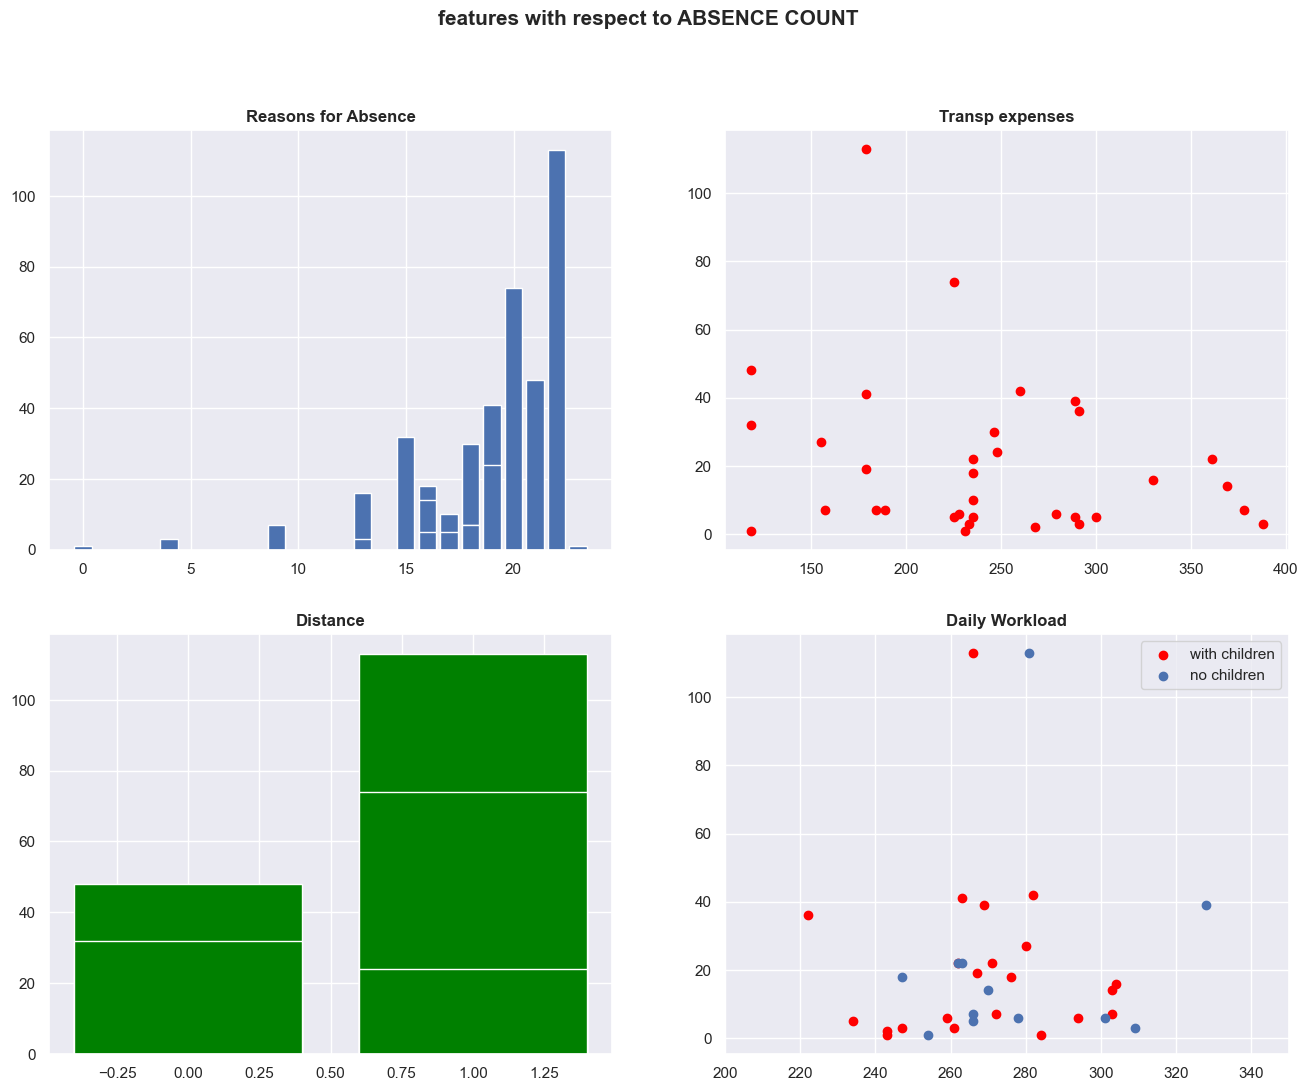

In [107]:
fig,axis=plt.subplots(2,2,figsize=(16,12))
axis[0,0].bar(new_abs_numeric[:,1],new_abs_numeric[:,10])
axis[0,0].set_title('Reasons for Absence',weight='bold')
axis[0,1].scatter(new_abs_numeric[:,2],new_abs_numeric[:,10],color='red')
axis[0,1].set_title('Transp expenses',weight='bold')
axis[1,0].bar(new_abs_numeric[:,3],new_abs_numeric[:,10],color='green')
axis[1,0].set_title('Distance',weight='bold')
axis[1,1].scatter(emp_withchildren_workload,new_abs_numeric[:,10],color='red')
axis[1,1].scatter(emp_withoutchildren_workload,new_abs_numeric[:,10])
#axis[1,1].scatter(new_abs_numeric[:,5],new_abs_numeric[:,10])
axis[1,1].set_title('Daily Workload',weight='bold')
plt.xlim(200,350)
plt.legend('upperleft',labels=['with children','no children'])
#axis[1,1].bar(new_abs_numeric[:,8],new_abs_numeric[:,10],color='red')
fig.suptitle('features with respect to ABSENCE COUNT',weight='bold',size=15)
fig.show()

### Droping transportation expenses

> everyone is supposedly getting payed fairly therefore its their responsibility to save a budget for transportation
> Meaning this feature in general has no effect whatsoever on the overall goal' 
>'That is predicting the reasons for absence , in persuit of maximizing overall productivity of the company'

In [111]:
new_abs_numeric=np.delete(new_abs_numeric,2,axis=1)
new_abs_numeric

array([[  1.,  18.,   0.,  37., 262.,   1.,   1.,   1.,   5.,  22.],
       [  2.,  17.,   1.,  48., 234.,   1.,   0.,   1.,   5.,   5.],
       [  3.,  22.,   1.,  38., 262.,   1.,   0.,   0.,   4., 113.],
       [  5.,  16.,   0.,  43., 266.,   1.,   0.,   1.,   5.,  18.],
       [  6.,  19.,   1.,  33., 276.,   0.,   0.,   1.,   8.,   7.],
       [  7.,   9.,   0.,  39., 303.,   0.,   0.,   1.,   5.,   6.],
       [  8.,   0.,   1.,  39., 294.,   1.,   0.,   1.,   0.,   1.],
       [  9.,  16.,   0.,  58., 243.,   0.,   0.,   1.,  22.,   6.],
       [ 10.,  20.,   1.,  28., 259.,   1.,   0.,   1.,   7.,  22.],
       [ 11.,  19.,   1.,  33., 271.,   1.,   0.,   1.,  11.,  39.],
       [ 12.,  16.,   1.,  31., 269.,   0.,   1.,   1.,   4.,   3.],
       [ 13.,  16.,   0.,  31., 261.,   0.,   0.,   1.,   7.,  14.],
       [ 14.,  19.,   0.,  34., 303.,   0.,   0.,   1.,  17.,  27.],
       [ 15.,  21.,   1.,  40., 280.,   0.,   0.,   1.,   6.,  36.],
       [ 16.,  23.,   0.,  46., 22

In [114]:
abs_headers=np.delete(abs_headers,3)
abs_headers

array(['ID', 'Reason for Absence', 'Date', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Overweight', 'Education', 'Children',
       'Absenteeism Time in Hours', 'Number Of absences'], dtype='<U25')

#### Date Column preprocess

In [120]:
abs_date.shape

(700,)

In [129]:
#Converting it to pandas for further preprocess
abs_date_pandas=pd.DataFrame(abs_date,columns=['absence date'])
abs_date_pandas

,absence date
0,07/07/2015
1,14/07/2015
2,15/07/2015
3,16/07/2015
4,23/07/2015
...,...
695,23/05/2018
696,23/05/2018
697,24/05/2018
698,24/05/2018


In [130]:
abs_date_pandas.dtypes

absence date    object
dtype: object

In [170]:
abs_date_pandas['absence date']=pd.to_datetime(abs_date_pandas['absence date'],format="%d/%m/%Y")
abs_date_pandas

,absence date
0,2015-07-07
1,2015-07-14
2,2015-07-15
3,2015-07-16
4,2015-07-23
...,...
695,2018-05-23
696,2018-05-23
697,2018-05-24
698,2018-05-24


In [171]:
abs_date_pandas.dtypes

absence date    datetime64[ns]
dtype: object

In [172]:
abs_date_pandas['absence date'].dt.year==2015

0       True
1       True
2       True
3       True
4       True
       ...  
695    False
696    False
697    False
698    False
699    False
Name: absence date, Length: 700, dtype: bool

In [173]:
df_yrs=abs_date_pandas['absence date'].dt.strftime('%Y')

In [174]:
pd.unique(df_yrs)

array(['2015', '2016', '2017', '2018'], dtype=object)

##### Spliting date into years for better visuals , checking trends

In [175]:
year2015=abs_date_pandas[abs_date_pandas['absence date'].dt.year == 2015]
year2016=abs_date_pandas[abs_date_pandas['absence date'].dt.year == 2016]
year2017=abs_date_pandas[abs_date_pandas['absence date'].dt.year == 2017]
year2018=abs_date_pandas[abs_date_pandas['absence date'].dt.year == 2018]

In [187]:
months15=year2015['absence date'].dt.month
months16=year2016['absence date'].dt.month
months17=year2017['absence date'].dt.month
months18=year2018['absence date'].dt.month

In [188]:
from collections import Counter
c15=Counter(months15)
c16=Counter(months16)
c17=Counter(months17)
c18=Counter(months18)

C:\Users\mmopa\AppData\Local\Temp\ipykernel_8644\4280591403.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


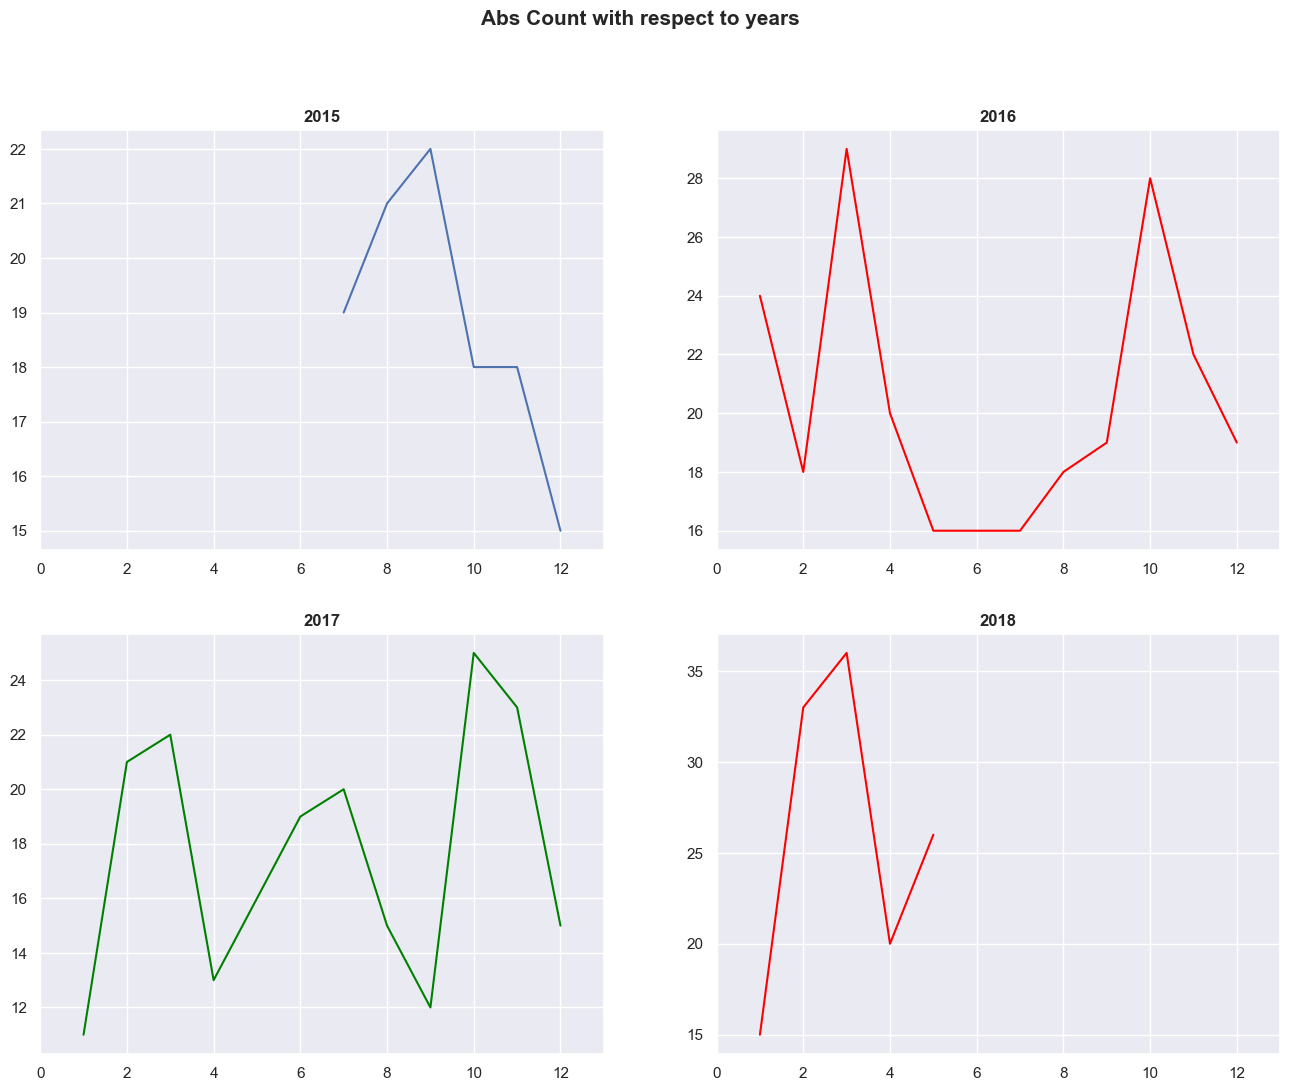

In [195]:
fig,axis=plt.subplots(2,2,figsize=(16,12))
axis[0,0].plot(c15.keys(),c15.values())eeeeeeeeeeeeeeeeeee
axis[0,0].set_title('2015',weight='bold')
axis[0,0].set_xlim(0,13)
axis[0,1].plot(c16.keys(),c16.values(),color='red')
axis[0,1].set_title('2016',weight='bold')
axis[0,1].set_xlim(0,13)
axis[1,0].plot(c17.keys(),c17.values(),color='green')
axis[1,0].set_title('2017',weight='bold')
axis[1,0].set_xlim(0,13)
axis[1,1].plot(c18.keys(),c18.values(),color='red')
#axis[1,1].scatter(emp_withoutchildren_workload,new_abs_numeric[:,10])
#axis[1,1].scatter(new_abs_numeric[:,5],new_abs_numeric[:,10])
axis[1,1].set_title('2018',weight='bold')
axis[1,1].set_xlim(0,13)
#plt.legend('upperleft',labels=['with children','no children'])
#axis[1,1].bar(new_abs_numeric[:,8],new_abs_numeric[:,10],color='red')
fig.suptitle('Abs Count with respect to years',weight='bold',size=15)

fig.show()

C:\Users\mmopa\AppData\Local\Temp\ipykernel_8644\3231865299.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend('upperright',labels=['2015','2016','2017','2018'])


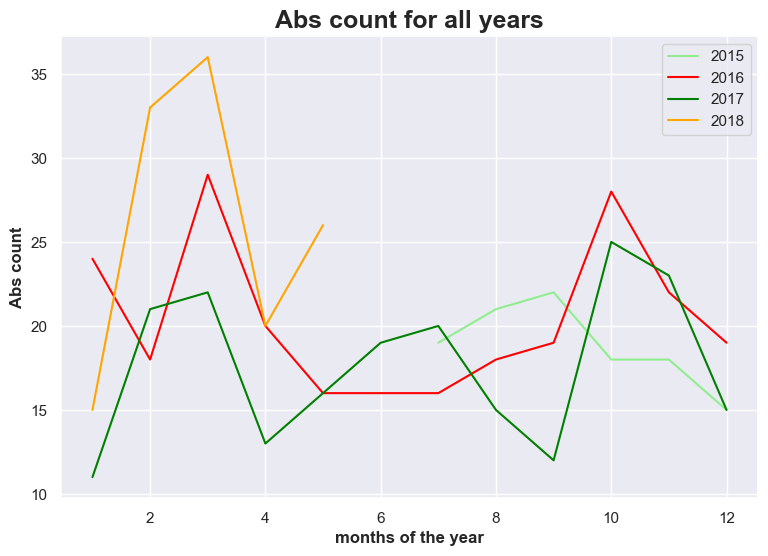

In [202]:
plt.figure(figsize=(9,6))
plt.plot(c15.keys(),c15.values(),color='lightgreen')
plt.plot(c16.keys(),c16.values(),color='red')
plt.plot(c17.keys(),c17.values(),color='green')
plt.plot(c18.keys(),c18.values(),color='orange')
plt.title('Abs count for all years',weight='bold',size=18)
plt.xlabel('months of the year',weight='bold')
plt.ylabel('Abs count',weight='bold')
plt.legend('upperright',labels=['2015','2016','2017','2018'])
plt.show()